In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [34]:
def test_features(df, features, target):
    """
    Test multiple features for linear regression models, visualize the regression for each feature
    with both training and testing data.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - features: List of feature names to test.
    - target: Name of the target variable.
    
    Returns:
    - A DataFrame with the results of the analysis for each feature.
    """
    # Initialize an empty list to store results
    results = []
    
    for feature in features:
        # Prepare the data
        X = df[[feature]]  # Feature matrix
        y = df[target]  # Target variable
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
        
        # Create and train the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict target values for both training and testing set
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate evaluation metrics using test set
        mae = round(mean_absolute_error(y_test, y_pred_test), 2)
        mse = round(mean_squared_error(y_test, y_pred_test), 2)
        rmse = round(mean_squared_error(y_test, y_pred_test, squared=False), 2)
        R2 = round(r2_score(y_test, y_pred_test), 2)
        
        # Append the results
        results.append({
            'Feature': feature,
            'Coefficient': round(model.coef_[0], 3),
            'Intercept': round(model.intercept_, 2),
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': R2
        })
        
        # Visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
        plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Testing data')
        plt.plot(X_train, y_pred_train, 'r-', linewidth=1, label='Model')
        plt.title(f'Linear Regression: {target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.legend()
        plt.show()
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [3]:
df = pd.read_csv('CropPol_field_level_data.csv')

In [36]:
crop_counts = df['crop'].value_counts()

# Display the counts of each unique string in the 'crop' column
print(crop_counts)

crop
Vaccinium corymbosum       586
Malus domestica            375
Citrullus lanatus          284
Brassica napus             254
Coffea canephora           193
Allium porrum              187
Coffea arabica             133
Helianthus annuus          126
Fragaria x ananassa        113
Prunus dulcis              108
Cucurbita pepo             106
Prunus avium               104
Malus pumila                89
Prunus cerasus              74
Trifolium pratense          63
Mangifera indica            60
Vicia faba                  60
Vaccinium macrocarpon       49
Solanum lycopersicum        39
Fagopyrum esculentum        38
Phaseolus vulgaris L.       35
Actinidia deliciosa         29
Persea americana            21
Anacardium occidentale      20
Capsicum annuum             18
Rubus idaeus                17
Passiflora edulis           16
Pyrus communis              14
Gossypium hirsutum          14
Cucumis melo                13
Cajanus cajan               12
Citrus paradisi             12
Cit

In [25]:
column_names = ['study_id', 'site_id', 'yield', 'yield_units', 'observed_pollinator_richness', 'country', 'abundance',
       'ab_honeybee', 'ab_bombus', 'ab_wildbees', 'ab_syrphids',
       'ab_humbleflies', 'ab_other_flies', 'ab_beetles', 'ab_lepidoptera',
       'ab_nonbee_hymenoptera', 'ab_others', 
       'visitation_rate', 'visit_honeybee', 'visit_bombus', 'visit_wildbees',
       'visit_syrphids', 'visit_humbleflies', 'visit_other_flies',
       'visit_beetles', 'visit_lepidoptera', 'visit_nonbee_hymenoptera',
       'visit_others']
df_normal = df[column_names]

In [26]:
df_normal = df_normal.dropna(subset=['yield', 'abundance'])
df_normal.shape

(1616, 28)

In [28]:
def normalize_group(df_group):
    scaler = StandardScaler()
    columns = ['yield', 'observed_pollinator_richness', 'abundance',
               'ab_honeybee', 'ab_bombus', 'ab_wildbees', 'ab_syrphids',
               'ab_humbleflies', 'ab_other_flies', 'ab_beetles', 'ab_lepidoptera',
               'ab_nonbee_hymenoptera', 'ab_others', 
               'visitation_rate', 'visit_honeybee', 'visit_bombus', 'visit_wildbees',
               'visit_syrphids', 'visit_humbleflies', 'visit_other_flies',
               'visit_beetles', 'visit_lepidoptera', 'visit_nonbee_hymenoptera',
               'visit_others']
    df_group[columns] = scaler.fit_transform(df_group[columns])
    return df_group


In [ ]:
# Group by 'study_id' and apply the normalization function
df_normalized = df_normal.groupby('study_id').apply(normalize_group)

# Rename the normalized columns to have 'n_' prefix
normalized_column_names = {'yield': 'n_yield', 'observed_pollinator_richness': 'n_observed_pollinator_richness',
                           'abundance': 'n_abundance', 'ab_honeybee': 'n_ab_honeybee', 
                           'ab_bombus': 'n_ab_bombus', 'ab_wildbees': 'n_ab_wildbees', 
                           'ab_syrphids': 'n_ab_syrphids', 'ab_humbleflies': 'n_ab_humbleflies', 
                           'ab_other_flies': 'n_ab_other_flies', 'ab_beetles': 'n_ab_beetles', 
                           'ab_lepidoptera': 'n_ab_lepidoptera', 'ab_nonbee_hymenoptera': 'n_ab_nonbee_hymenoptera', 
                           'ab_others': 'n_ab_others', 'visitation_rate': 'n_visitation_rate', 
                           'visit_honeybee': 'n_visit_honeybee', 'visit_bombus': 'n_visit_bombus', 
                           'visit_wildbees': 'n_visit_wildbees', 'visit_syrphids': 'n_visit_syrphids', 
                           'visit_humbleflies': 'n_visit_humbleflies', 'visit_other_flies': 'n_visit_other_flies', 
                           'visit_beetles': 'n_visit_beetles', 'visit_lepidoptera': 'n_visit_lepidoptera', 
                           'visit_nonbee_hymenoptera': 'n_visit_nonbee_hymenoptera', 'visit_others': 'n_visit_others'}

# Adjust the normalization function or apply renaming after normalization if needed
# df_normalized.rename(columns=normalized_column_names, inplace=True)


In [30]:
df_normalized.isna().sum()

study_id                          0
site_id                           0
yield                             0
yield_units                      44
observed_pollinator_richness    477
country                           0
abundance                         0
ab_honeybee                      25
ab_bombus                        36
ab_wildbees                      63
ab_syrphids                     114
ab_humbleflies                  123
ab_other_flies                  123
ab_beetles                      128
ab_lepidoptera                  123
ab_nonbee_hymenoptera           128
ab_others                       128
visitation_rate                 771
visit_honeybee                  777
visit_bombus                    786
visit_wildbees                  816
visit_syrphids                  842
visit_humbleflies               886
visit_other_flies               873
visit_beetles                   886
visit_lepidoptera               886
visit_nonbee_hymenoptera        886
visit_others                

In [32]:
columns_to_fill = ['observed_pollinator_richness',
                   'ab_honeybee', 'ab_bombus', 'ab_wildbees', 'ab_syrphids',
                   'ab_humbleflies', 'ab_other_flies', 'ab_beetles', 'ab_lepidoptera',
                   'ab_nonbee_hymenoptera', 'ab_others', 
                   'visitation_rate', 'visit_honeybee', 'visit_bombus', 'visit_wildbees',
                   'visit_syrphids', 'visit_humbleflies', 'visit_other_flies',
                   'visit_beetles', 'visit_lepidoptera', 'visit_nonbee_hymenoptera',
                   'visit_others']

df_filled = df_normalized.copy()  # Make a copy if you want to keep df_normalized unchanged

df_filled[columns_to_fill] = df_filled[columns_to_fill].fillna(0)



All crops correlation with yield

In [33]:
# Select only the numerical columns for correlation
numerical_df_filled = df_filled.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_filled.corr()

# Extract the correlations of 'fruit_set' with other columns
filled_yield_corr = corr['yield']

# Display the correlations
print('Fruit Set / Yield')
print(filled_yield_corr)

Fruit Set / Yield
yield                           1.000000
observed_pollinator_richness    0.094110
abundance                       0.153263
ab_honeybee                     0.089651
ab_bombus                       0.031744
ab_wildbees                     0.115714
ab_syrphids                     0.092004
ab_humbleflies                  0.030399
ab_other_flies                  0.077431
ab_beetles                     -0.028065
ab_lepidoptera                  0.026380
ab_nonbee_hymenoptera           0.033607
ab_others                      -0.011884
visitation_rate                 0.082037
visit_honeybee                  0.092190
visit_bombus                    0.013428
visit_wildbees                  0.044617
visit_syrphids                  0.008036
visit_humbleflies               0.018858
visit_other_flies               0.036474
visit_beetles                  -0.026806
visit_lepidoptera               0.013759
visit_nonbee_hymenoptera       -0.019044
visit_others                   -0.02424

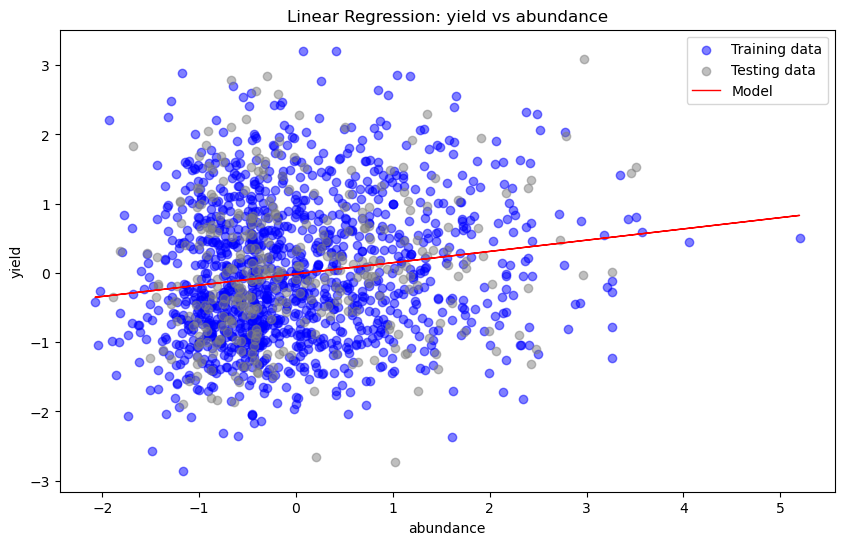

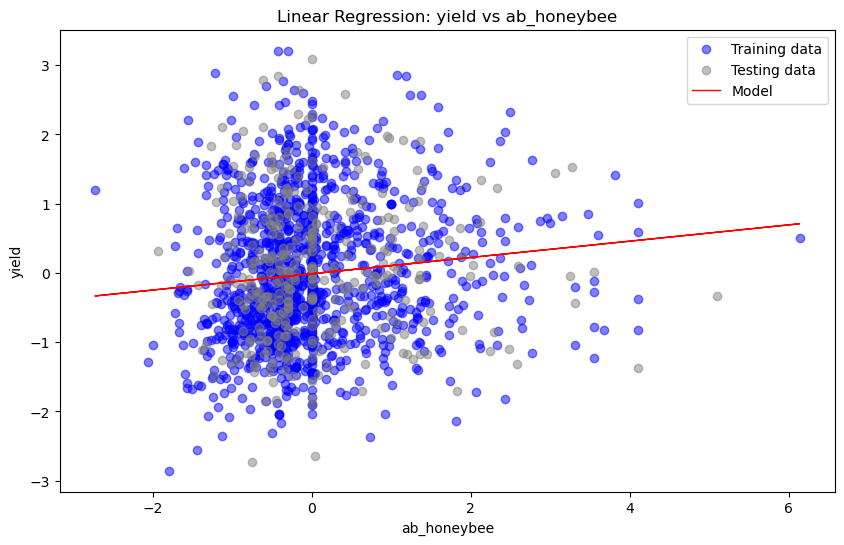

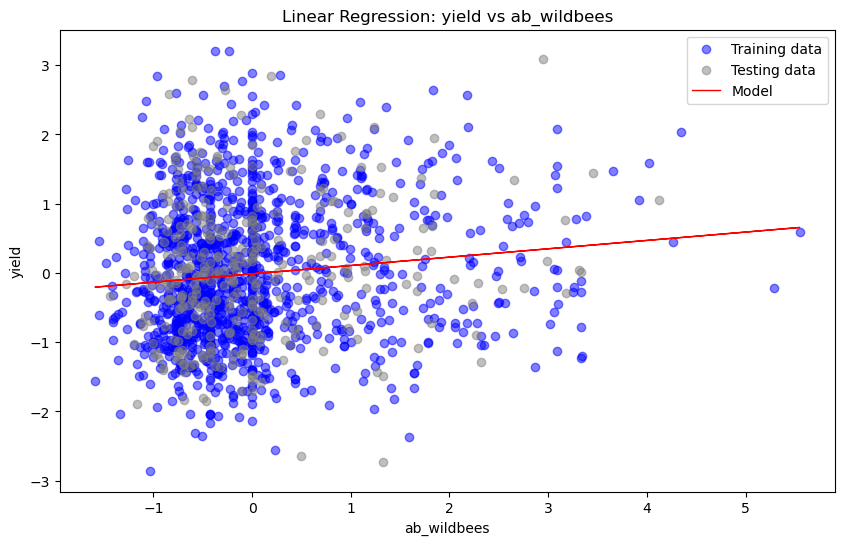

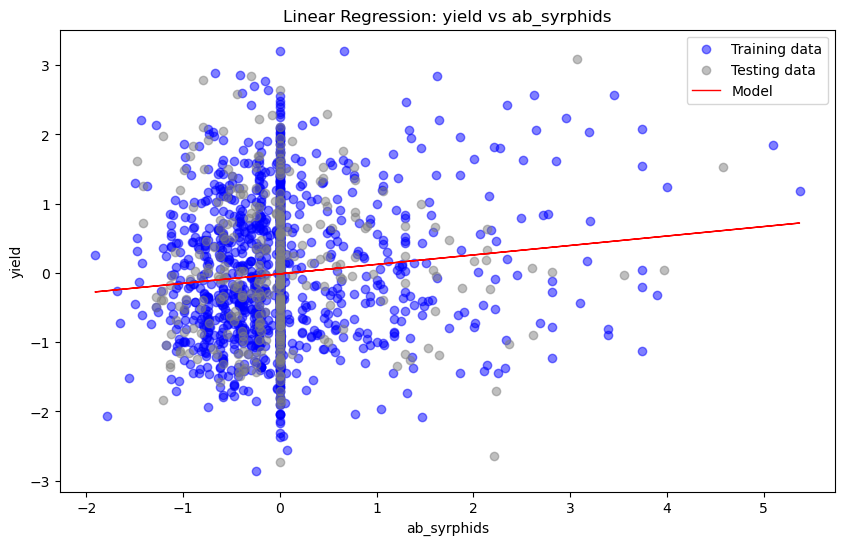

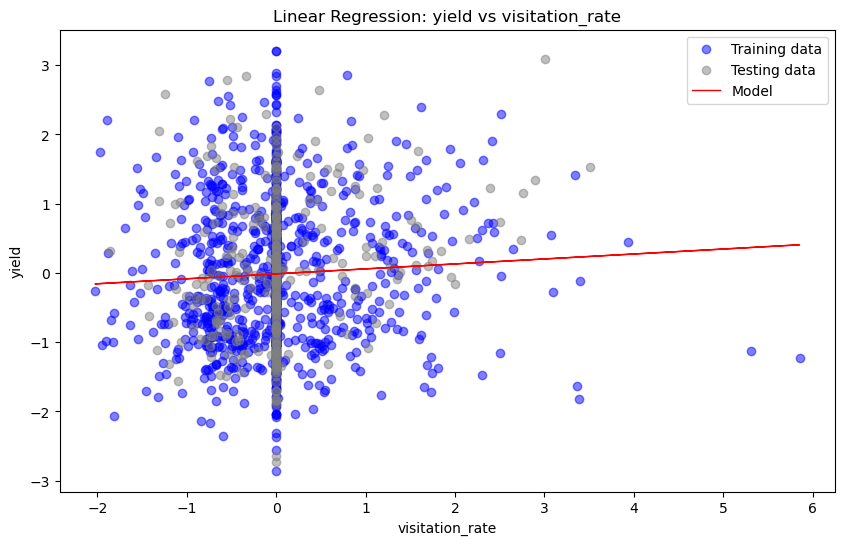

,Feature,Coefficient,Intercept,MAE,MSE,RMSE,R2
0,abundance,0.163,-0.01,0.79,1.01,1.00,0.01
1,ab_honeybee,0.118,-0.01,0.80,1.03,1.01,-0.02
2,ab_wildbees,0.121,-0.02,0.79,1.01,1.00,0.01
3,ab_syrphids,0.137,-0.02,0.80,1.03,1.01,-0.01
4,visitation_rate,0.072,-0.01,0.79,1.00,1.00,0.01


In [35]:
features_to_test = ['abundance', 'ab_honeybee', 'ab_wildbees', 'ab_syrphids', 'visitation_rate']
target_column = 'yield'
results_df = test_features(df_filled, features_to_test, target_column)

display(results_df)

END SECTION##

In [9]:
# Remove rows where 'yield' column has missing values
df_yield = df.dropna(subset=['yield'])
df_yield.shape

(2552, 65)

In [10]:

# Assuming df is your DataFrame
# Calculate the Z-Score for 'yield' within each 'study_id' group

df_yield['normalized_yield'] = df_yield.groupby('study_id')['yield'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# This will create the 'normalized_yield' column where each value is the Z-Score of 'yield' within its 'study_id' group


C:\Users\psabi\AppData\Local\Temp\ipykernel_19728\661447183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yield['normalized_yield'] = df_yield.groupby('study_id')['yield'].transform(


In [11]:
appleCrop = ['Malus domestica']
df_apples = df_yield[df_yield['crop'].isin(appleCrop)]
df_apples.shape

(252, 66)

In [12]:
column_names = ['study_id', 'site_id', 'yield', 'normalized_yield', 'yield_units', 'yield2', 'yield2_units', 'sampling_richness', 'observed_pollinator_richness', 'sampling_abundance', 'abundance',
       'ab_honeybee', 'ab_bombus', 'ab_wildbees', 'ab_syrphids',
       'ab_humbleflies', 'ab_other_flies', 'ab_beetles', 'ab_lepidoptera',
       'ab_nonbee_hymenoptera', 'ab_others', 
       'visitation_rate', 'visit_honeybee', 'visit_bombus', 'visit_wildbees',
       'visit_syrphids', 'visit_humbleflies', 'visit_other_flies',
       'visit_beetles', 'visit_lepidoptera', 'visit_nonbee_hymenoptera',
       'visit_others']
df_app = df_apples[column_names]

In [13]:
df_app.shape

(252, 32)

In [19]:
# Remove rows where 'yield' column has missing values
df_app = df_app.dropna(subset=['abundance'])
df_app.shape

(248, 32)

In [20]:
# Select only the numerical columns for correlation
numerical_df_app = df_app.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_app.corr()

# Extract the correlations of 'fruit_set' with other columns
app_yield_corr = corr['normalized_yield']

# Display the correlations
print('Fruit Set / Yield')
print(app_yield_corr)



Fruit Set / Yield
yield                           0.259583
normalized_yield                1.000000
yield2                          0.207485
observed_pollinator_richness   -0.006247
abundance                       0.046519
ab_honeybee                     0.041867
ab_bombus                       0.018171
ab_wildbees                    -0.008133
ab_syrphids                     0.103986
ab_humbleflies                  0.097767
ab_other_flies                  0.037568
ab_beetles                     -0.008241
ab_lepidoptera                  0.005231
ab_nonbee_hymenoptera          -0.068558
ab_others                       0.040661
visitation_rate                 0.015321
visit_honeybee                 -0.069850
visit_bombus                   -0.032899
visit_wildbees                  0.089707
visit_syrphids                  0.143290
visit_humbleflies               0.142697
visit_other_flies               0.085545
visit_beetles                   0.043361
visit_lepidoptera               0.00779

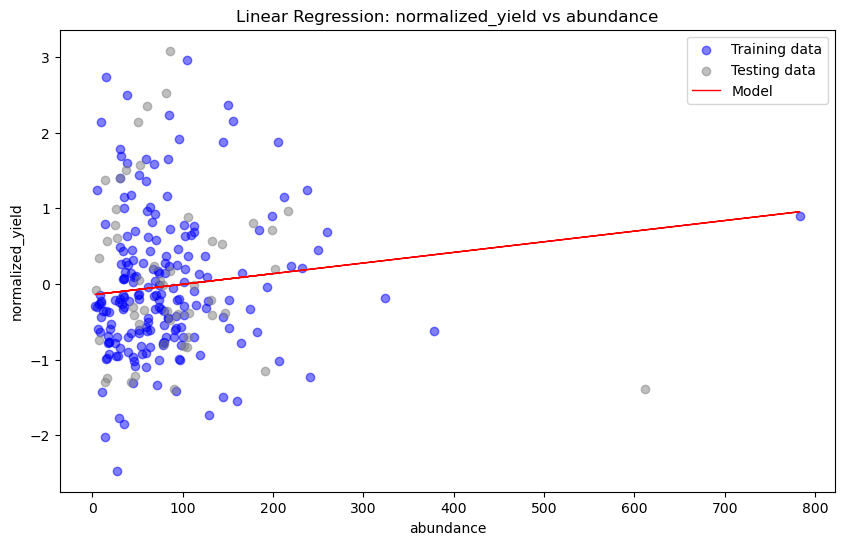

,Feature,Coefficient,Intercept,MAE,MSE,RMSE,R2
0,abundance,0.001,-0.14,0.85,1.21,1.1,-0.08


In [23]:
# Example usage
features_to_test = ['abundance']
target_column = 'normalized_yield'
results_df = test_features(df_app, features_to_test, target_column)

display(results_df)
